In [2]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git data

Cloning into 'data'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 384 (delta 0), pack-reused 3439
Receiving objects: 100% (3839/3839), 100.58 MiB | 48.44 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [4]:
!ls data/train

dress  hat  longsleeve	outwear  pants	shirt  shoes  shorts  skirt  t-shirt


In [3]:
import tensorflow as tf
import numpy as np

In [4]:
from tensorflow import keras

In [5]:
tf.__version__

'2.9.1'

In [6]:
from tensorflow.keras.preprocessing.image import load_img

In [7]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions


In [19]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [15]:
filename = './data/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
img = load_img(filename, target_size=(299, 299))

x = np.array(img)
X = np.array([x])

X = preprocess_input(X)

In [55]:
X = preprocess_input(X)

In [56]:
predictions = model.predict(X)

1/1 [==============================] - 0s 22ms/step


In [61]:
decode_predictions(predictions)

35363/35363 [==============================] - 0s 1us/step


[[('n03595614', 'jersey', 0.6792451),
  ('n02916936', 'bulletproof_vest', 0.03960026),
  ('n04370456', 'sweatshirt', 0.035299566),
  ('n03710637', 'maillot', 0.010884127),
  ('n04525038', 'velvet', 0.0018057587)]]

## Trainining our model

In [67]:
filename = './data/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
img = load_img(filename, target_size=(150, 150))

x = np.array(img)
X = np.array([x])

X = preprocess_input(X)

In [69]:
X.shape

(1, 150, 150, 3)

In [82]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)

vector = keras.layers.GlobalAveragePooling2D()(base)

predictions = keras.layers.Dense(10)(vector)

outputs = predictions

model = keras.Model(inputs, outputs)

In [84]:
y_pred = model.predict(X)

1/1 [==============================] - 0s 22ms/step


In [90]:
!ls data/

LICENSE  README.md  test  train  validation


In [87]:
y_pred

array([[ 0.40514612,  0.6714813 , -0.14833295, -0.55898917, -1.5090969 ,
        -0.05887775,  0.22778702, -0.40802106,  0.07073148, -0.5668413 ]],
      dtype=float32)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_ds = train_gen.flow_from_directory(
    "./data/train/",
    target_size=(150, 150),
    batch_size=32
)


val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

val_ds = val_gen.flow_from_directory(
    "./data/validation/",
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [38]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)
base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vector = keras.layers.GlobalAveragePooling2D()(base)

predictions = keras.layers.Dense(10)(vector)

outputs = predictions

model = keras.Model(inputs, outputs)

In [39]:
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [40]:
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
)

In [42]:
model.save_weights('model.h5')

In [44]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_epoch={epoch:02d}_accuracy={val_accuracy:.3f}.h5',
    monitor='val_accuracy',
    save_best_only=True
)

history1 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 [==============================] - 15s 135ms/step - loss: 1.1224 - accuracy: 0.6193 - val_loss: 0.7352 - val_accuracy: 0.7683
Epoch 2/10
96/96 [==============================] - 12s 127ms/step - loss: 0.6344 - accuracy: 0.7859 - val_loss: 0.6272 - val_accuracy: 0.7889
Epoch 3/10
96/96 [==============================] - 12s 122ms/step - loss: 0.5168 - accuracy: 0.8295 - val_loss: 0.6123 - val_accuracy: 0.7889
Epoch 4/10
96/96 [==============================] - 12s 125ms/step - loss: 0.4322 - accuracy: 0.8621 - val_loss: 0.5708 - val_accuracy: 0.8152
Epoch 5/10
96/96 [==============================] - 12s 121ms/step - loss: 0.3735 - accuracy: 0.8846 - val_loss: 0.5454 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 12s 125ms/step - loss: 0.3289 - accuracy: 0.9051 - val_loss: 0.5507 - val_accuracy: 0.8299
Epoch 7/10
85/96 [=========================>....] - ETA: 1s - loss: 0.2907 - accuracy: 0.9246

KeyboardInterrupt: 

In [26]:
import matplotlib.pyplot as plt

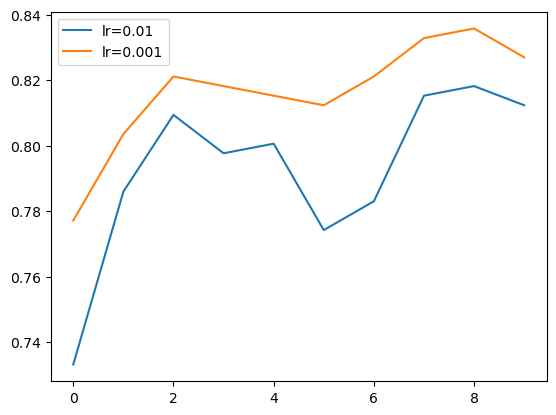

In [35]:
plt.plot(history.history['val_accuracy'], label='lr=0.01')
plt.plot(history1.history['val_accuracy'], label='lr=0.001')

plt.legend()

In [ ]:
history1 = model.fit(train_ds, validation_data=val_ds, epochs=10)

## Improve the model

In [53]:
def make_model(learning_rate=0.001, inner_layer_size=100, droprate=0.2, size=150):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(size, size, 3)
    )
    base_model.trainable = False

    inputs = keras.Input(shape=(size, size, 3))

    base = base_model(inputs, training=False)

    vector = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(inner_layer_size, activation='relu')(vector)
    
    drop = keras.layers.Dropout(droprate)(inner)

    predictions = keras.layers.Dense(10)(drop)

    outputs = predictions

    model = keras.Model(inputs, outputs)
    
    learning_rate = 0.001
    optimizer = keras.optimizers.Adam(learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [54]:
scores = {}

for droprate in [0.2, 0.5]:#, 0.8]:

    model = make_model(
        learning_rate=0.001,
        inner_layer_size=100,
        droprate=droprate
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=15
    )

    scores[droprate] = history.history

Epoch 1/15
96/96 [==============================] - 15s 139ms/step - loss: 1.0260 - accuracy: 0.6460 - val_loss: 0.6799 - val_accuracy: 0.7771
Epoch 2/15
96/96 [==============================] - 12s 123ms/step - loss: 0.5812 - accuracy: 0.7986 - val_loss: 0.6019 - val_accuracy: 0.7889
Epoch 3/15
96/96 [==============================] - 12s 122ms/step - loss: 0.4523 - accuracy: 0.8488 - val_loss: 0.5746 - val_accuracy: 0.8065
Epoch 4/15
96/96 [==============================] - 12s 123ms/step - loss: 0.3642 - accuracy: 0.8735 - val_loss: 0.5685 - val_accuracy: 0.8035
Epoch 5/15
96/96 [==============================] - 12s 126ms/step - loss: 0.2815 - accuracy: 0.9055 - val_loss: 0.5650 - val_accuracy: 0.8035
Epoch 6/15
96/96 [==============================] - 12s 122ms/step - loss: 0.2192 - accuracy: 0.9299 - val_loss: 0.5657 - val_accuracy: 0.8123
Epoch 7/15
96/96 [==============================] - 12s 122ms/step - loss: 0.1743 - accuracy: 0.9469 - val_loss: 0.5422 - val_accuracy: 0.8211

[0.7976539731025696,
 0.7829912304878235,
 0.8093841671943665,
 0.8152492642402649,
 0.8211143612861633,
 0.8269794583320618,
 0.829912006855011,
 0.8152492642402649,
 0.8357771039009094,
 0.8387096524238586,
 0.8357771039009094,
 0.8387096524238586,
 0.8475073575973511,
 0.8357771039009094,
 0.8416422009468079]

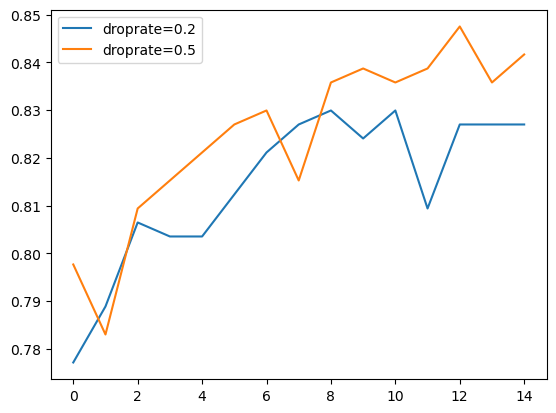

In [59]:
plt.plot(scores[0.2]['val_accuracy'], label='droprate=0.2')
plt.plot(scores[0.5]['val_accuracy'], label='droprate=0.5')

plt.legend()

## Data augmentation

In [60]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    "./data/train/",
    target_size=(150, 150),
    batch_size=32
)


val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

val_ds = val_gen.flow_from_directory(
    "./data/validation/",
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [61]:
model = make_model(
    learning_rate=0.001,
    inner_layer_size=100,
    droprate=0.5
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50
)

Epoch 1/50
96/96 [==============================] - 27s 257ms/step - loss: 1.3685 - accuracy: 0.5469 - val_loss: 0.7921 - val_accuracy: 0.7478
Epoch 2/50
96/96 [==============================] - 24s 246ms/step - loss: 0.9601 - accuracy: 0.6728 - val_loss: 0.6769 - val_accuracy: 0.7801
Epoch 3/50
96/96 [==============================] - 24s 247ms/step - loss: 0.8176 - accuracy: 0.7203 - val_loss: 0.6321 - val_accuracy: 0.7771
Epoch 4/50
73/96 [=====================>........] - ETA: 5s - loss: 0.7225 - accuracy: 0.7547

KeyboardInterrupt: 

## Big model

In [63]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    "./data/train/",
    target_size=(299, 299),
    batch_size=32
)


val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

val_ds = val_gen.flow_from_directory(
    "./data/validation/",
    target_size=(299, 299),
    batch_size=32
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [65]:
model = make_model(
    learning_rate=0.001,
    inner_layer_size=100,
    droprate=0.5,
    size=299
)

checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_epoch={epoch:02d}_accuracy={val_accuracy:.3f}.h5',
    monitor='val_accuracy',
    save_best_only=True
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[checkpoint]
)

Epoch 1/50


KeyboardInterrupt: 

## Applying the model

In [66]:
model = keras.models.load_model('xception_v4_epoch=03_accuracy=0.871.h5')

In [89]:
test_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_ds = test_gen.flow_from_directory(
    "./data/test/",
    target_size=(299, 299),
    batch_size=32
)

Found 372 images belonging to 10 classes.


In [90]:
model.evaluate(test_ds)

12/12 [==============================] - 4s 280ms/step - loss: 0.3143 - accuracy: 0.8952


[0.3142937123775482, 0.8951612710952759]

In [84]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1024px-Cat03.jpg -O cat.jpg

--2022-10-05 14:37:22--  https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1024px-Cat03.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119032 (116K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>] 116.24K  --.-KB/s    in 0.05s   

2022-10-05 14:37:22 (2.21 MB/s) - ‘cat.jpg’ saved [119032/119032]



In [85]:
filename = 'cat.jpg'
img = load_img(filename, target_size=(299, 299))

x = np.array(img)
X = np.array([x])

X = preprocess_input(X)

In [86]:
y_pred = model.predict(X)

1/1 [==============================] - 0s 24ms/step


In [87]:
y_pred

array([[-0.5819975 ,  1.5349888 , -0.62116927, -0.52717155, -1.4244376 ,
        -1.1006613 ,  1.1833252 , -1.5793614 , -1.7063088 ,  0.17885916]],
      dtype=float32)

In [76]:
!ls data/train/

dress  hat  longsleeve	outwear  pants	shirt  shoes  shorts  skirt  t-shirt


In [78]:
classes = 'dress  hat  longsleeve	outwear  pants	shirt  shoes  shorts  skirt  t-shirt'.split()

In [79]:
classes

['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

In [88]:
dict(zip(classes, y_pred[0]))

{'dress': -0.5819975,
 'hat': 1.5349888,
 'longsleeve': -0.62116927,
 'outwear': -0.52717155,
 'pants': -1.4244376,
 'shirt': -1.1006613,
 'shoes': 1.1833252,
 'shorts': -1.5793614,
 'skirt': -1.7063088,
 't-shirt': 0.17885916}